# EDA

## 1. Carga De Datos

Primero, nos encargamos de cargar las bases de datos que sí se han descargado de la página web. (Cambiar función para leer todas las bases de datos posibles.) Haremos un inner join y de esta manera obtendremos un conjunto de datos con todas las bases de datos que se han descargado.

In [98]:
import pandas as pd
import seaborn as sns
from thefuzz import fuzz
from thefuzz import process
import matplotlib.pyplot as plt
import numpy as np
import os
import glob
import re
import unidecode

def load_datasets(directory):
    # Get a list of all CSV files in the directory
    csv_files = glob.glob(os.path.join(directory, '*.csv'))

    # Read each CSV file and store the DataFrame in a list
    dataframes = [pd.read_csv(file, encoding='cp1252', index_col=0, skiprows=1) for file in csv_files]

    # Concatenate all DataFrames in the list
    merged_df = pd.concat(dataframes, join='inner', ignore_index=True)

    return merged_df

Cargamos el dataset de Inegi.

In [99]:
inegi_df = pd.read_csv('../../data/dataset_inegi.csv', encoding='cp1252')

In [100]:
inegi_df.columns

Index(['MAPA', 'Estatus', 'CVE_ENT', 'NOM_ENT', 'NOM_ABR', 'CVE_MUN',
       'NOM_MUN', 'CVE_LOC', 'NOM_LOC', 'AMBITO', 'LATITUD', 'LONGITUD',
       'LAT_DECIMAL', 'LON_DECIMAL', 'ALTITUD', 'CVE_CARTA', 'POB_TOTAL',
       'POB_MASCULINA', 'POB_FEMENINA', 'TOTAL DE VIVIENDAS HABITADAS'],
      dtype='object')

In [101]:
inegi_df = inegi_df.sort_values(by='NOM_ENT', ascending=True)

In [102]:
inegi_df.drop(columns=['MAPA'])

,Estatus,CVE_ENT,NOM_ENT,NOM_ABR,CVE_MUN,NOM_MUN,CVE_LOC,NOM_LOC,AMBITO,LATITUD,LONGITUD,LAT_DECIMAL,LON_DECIMAL,ALTITUD,CVE_CARTA,POB_TOTAL,POB_MASCULINA,POB_FEMENINA,TOTAL DE VIVIENDAS HABITADAS
0,NaN,1,Aguascalientes,Ags.,1,Aguascalientes,1,Aguascalientes,U,"21°52´47.362N""","102°17´45.768W""",21.879822,-102.296046,1878,F13D19,863893,419168,444725,246259
1909,NaN,1,Aguascalientes,Ags.,6,Pabellón de Arteaga,441,Los Sauces,R,"22°08´33.710N""","102°18´05.905W""",22.142697,-102.301640,1900,F13B89,8,*,*,2
1910,NaN,1,Aguascalientes,Ags.,6,Pabellón de Arteaga,442,Yiyo [Granja],R,"22°06´19.252N""","102°15´14.132W""",22.105348,-102.253926,1911,F13B89,12,*,*,2
1911,NaN,1,Aguascalientes,Ags.,6,Pabellón de Arteaga,443,Los Tulipanes,R,"22°06´59.761N""","102°15´40.931W""",22.116600,-102.261370,1899,F13B89,5,*,*,1
1912,NaN,1,Aguascalientes,Ags.,6,Pabellón de Arteaga,444,El Amarillo [Sociedad],R,"22°04´37.424N""","102°19´05.023W""",22.077062,-102.318061,1922,F13B89,1,*,*,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295153,NaN,32,Zacatecas,Zac.,19,Jalpa,371,Fraccionamiento Solidaridad (El Fanfarrón),R,"21°37´08.255N""","102°59´49.976W""",21.618959,-102.997215,1411,F13D27,33,*,*,2
295152,NaN,32,Zacatecas,Zac.,19,Jalpa,368,Colonia del Sol,R,"21°38´20.000N""","103°00´04.000W""",21.638889,-103.001111,1444,F13D26,196,98,98,58
295151,NaN,32,Zacatecas,Zac.,19,Jalpa,367,El Salitrillo,R,"21°43´52.081N""","102°51´54.317W""",21.731133,-102.865088,1519,F13D27,60,26,34,20
295161,NaN,32,Zacatecas,Zac.,19,Jalpa,381,Fraccionamiento San Marcos,R,"21°39´22.144N""","102°59´46.469W""",21.656151,-102.996241,1445,F13D27,304,153,151,72


In [103]:
inegi_df

,MAPA,Estatus,CVE_ENT,NOM_ENT,NOM_ABR,CVE_MUN,NOM_MUN,CVE_LOC,NOM_LOC,AMBITO,LATITUD,LONGITUD,LAT_DECIMAL,LON_DECIMAL,ALTITUD,CVE_CARTA,POB_TOTAL,POB_MASCULINA,POB_FEMENINA,TOTAL DE VIVIENDAS HABITADAS
0,10010001,NaN,1,Aguascalientes,Ags.,1,Aguascalientes,1,Aguascalientes,U,"21°52´47.362N""","102°17´45.768W""",21.879822,-102.296046,1878,F13D19,863893,419168,444725,246259
1909,10060441,NaN,1,Aguascalientes,Ags.,6,Pabellón de Arteaga,441,Los Sauces,R,"22°08´33.710N""","102°18´05.905W""",22.142697,-102.301640,1900,F13B89,8,*,*,2
1910,10060442,NaN,1,Aguascalientes,Ags.,6,Pabellón de Arteaga,442,Yiyo [Granja],R,"22°06´19.252N""","102°15´14.132W""",22.105348,-102.253926,1911,F13B89,12,*,*,2
1911,10060443,NaN,1,Aguascalientes,Ags.,6,Pabellón de Arteaga,443,Los Tulipanes,R,"22°06´59.761N""","102°15´40.931W""",22.116600,-102.261370,1899,F13B89,5,*,*,1
1912,10060444,NaN,1,Aguascalientes,Ags.,6,Pabellón de Arteaga,444,El Amarillo [Sociedad],R,"22°04´37.424N""","102°19´05.023W""",22.077062,-102.318061,1922,F13B89,1,*,*,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295153,320190371,NaN,32,Zacatecas,Zac.,19,Jalpa,371,Fraccionamiento Solidaridad (El Fanfarrón),R,"21°37´08.255N""","102°59´49.976W""",21.618959,-102.997215,1411,F13D27,33,*,*,2
295152,320190368,NaN,32,Zacatecas,Zac.,19,Jalpa,368,Colonia del Sol,R,"21°38´20.000N""","103°00´04.000W""",21.638889,-103.001111,1444,F13D26,196,98,98,58
295151,320190367,NaN,32,Zacatecas,Zac.,19,Jalpa,367,El Salitrillo,R,"21°43´52.081N""","102°51´54.317W""",21.731133,-102.865088,1519,F13D27,60,26,34,20
295161,320190381,NaN,32,Zacatecas,Zac.,19,Jalpa,381,Fraccionamiento San Marcos,R,"21°39´22.144N""","102°59´46.469W""",21.656151,-102.996241,1445,F13D27,304,153,151,72


In [104]:
df = load_datasets("../../data/fertilizantes_autorizados")
df

,ESTADO,MUNICIPIO,ACUSE,APELLIDO PATERNO,APELLIDO MATERNO,NOMBRE (S),PAQUETE
0,TLAXCALA,ACUAMANALA DE MIGUEL HIDALGO,23-PRONAFE-FERT-000018-S000-TL,AGUILA,LIMA,J. EUGENIO,2
1,TLAXCALA,ACUAMANALA DE MIGUEL HIDALGO,23-PRONAFE-FERT-000016-S000-TL,CORTE,ESPINOZA,MA. PETRA APOLONIA,2
2,TLAXCALA,ACUAMANALA DE MIGUEL HIDALGO,23-PRONAFE-FERT-000005-S000-TL,CORTE,PICHON,TERESA,2
3,TLAXCALA,ACUAMANALA DE MIGUEL HIDALGO,23-PRONAFE-FERT-000006-S000-TL,CUAHTEPITZI,LUNA,FLORENCIO,2
4,TLAXCALA,ACUAMANALA DE MIGUEL HIDALGO,23-PRONAFE-FERT-000007-S000-TL,CUAHTEPITZI,SANCHEZ,JOSE SIMON MARTIN,2
...,...,...,...,...,...,...,...
1525715,PUEBLA,ZOQUITLAN,23-PRONAFE-FERT-103186-S000-PL,ZAQUEROZ,MONTALVO,ZEFERINO,1
1525716,PUEBLA,ZOQUITLAN,23-PRONAFE-FERT-103187-S000-PL,ZAQUEROZ,SANCHEZ,CRECENCIO,2
1525717,PUEBLA,ZOQUITLAN,23-PRONAFE-FERT-103188-S000-PL,ZAQUEROZ,SANCHEZ,JOSE,1
1525718,PUEBLA,ZOQUITLAN,23-PRONAFE-FERT-103189-S000-PL,ZAQUEROZ,SANCHEZ,MARTIN,1


In [105]:
df = df.sort_values(by='ESTADO', ascending=True)

In [106]:
df

,ESTADO,MUNICIPIO,ACUSE,APELLIDO PATERNO,APELLIDO MATERNO,NOMBRE (S),PAQUETE
34608,AGUASCALIENTES,TEPEZALA,23-PRONAFE-FERT-006426-S000-AS,VERA,MARTINEZ,ROBERTO,2
30133,AGUASCALIENTES,ASIENTOS,23-PRONAFE-FERT-001512-S000-AS,SANCHEZ,BERNAL,LIDIA,1
30134,AGUASCALIENTES,ASIENTOS,23-PRONAFE-FERT-001872-S000-AS,SANCHEZ,BERNAL,VICTORIO,2
30135,AGUASCALIENTES,ASIENTOS,23-PRONAFE-FERT-001538-S000-AS,SANCHEZ,CAMPOS,EVA,2
30136,AGUASCALIENTES,ASIENTOS,23-PRONAFE-FERT-002131-S000-AS,SANCHEZ,CASTILLO,ALFONSO,2
...,...,...,...,...,...,...,...
437502,YUCATAN,HALACHO,23-PRONAFE-FERT-009316-S000-YN,TZEK,KU,ELOY,1
437501,YUCATAN,HALACHO,23-PRONAFE-FERT-009315-S000-YN,TZEK,CAUICH,ENRIQUE,1
437500,YUCATAN,HALACHO,23-PRONAFE-FERT-009313-S000-YN,TZEK,CANUL,FAUSTINO,1
437524,YUCATAN,HALACHO,23-PRONAFE-FERT-009338-S000-YN,UC,CANUL,RICARDO MIGUEL,1


## 2. Análisis del problema

### 2.1 Estructura de los datos

Comencemos por ver como ha quedado el principio y final de nuestro dataset, si la union no ha sido correcta podremos verlos aquí.

In [107]:
df.head()

,ESTADO,MUNICIPIO,ACUSE,APELLIDO PATERNO,APELLIDO MATERNO,NOMBRE (S),PAQUETE
34608,AGUASCALIENTES,TEPEZALA,23-PRONAFE-FERT-006426-S000-AS,VERA,MARTINEZ,ROBERTO,2
30133,AGUASCALIENTES,ASIENTOS,23-PRONAFE-FERT-001512-S000-AS,SANCHEZ,BERNAL,LIDIA,1
30134,AGUASCALIENTES,ASIENTOS,23-PRONAFE-FERT-001872-S000-AS,SANCHEZ,BERNAL,VICTORIO,2
30135,AGUASCALIENTES,ASIENTOS,23-PRONAFE-FERT-001538-S000-AS,SANCHEZ,CAMPOS,EVA,2
30136,AGUASCALIENTES,ASIENTOS,23-PRONAFE-FERT-002131-S000-AS,SANCHEZ,CASTILLO,ALFONSO,2


In [108]:
df.tail()

,ESTADO,MUNICIPIO,ACUSE,APELLIDO PATERNO,APELLIDO MATERNO,NOMBRE (S),PAQUETE
437502,YUCATAN,HALACHO,23-PRONAFE-FERT-009316-S000-YN,TZEK,KU,ELOY,1
437501,YUCATAN,HALACHO,23-PRONAFE-FERT-009315-S000-YN,TZEK,CAUICH,ENRIQUE,1
437500,YUCATAN,HALACHO,23-PRONAFE-FERT-009313-S000-YN,TZEK,CANUL,FAUSTINO,1
437524,YUCATAN,HALACHO,23-PRONAFE-FERT-009338-S000-YN,UC,CANUL,RICARDO MIGUEL,1
442423,YUCATAN,OPICHEN,23-PRONAFE-FERT-015265-S000-YN,CHI,POOL,VICTOR ELADIO,1


### 2.2 Información general 
Siempre es importante entender nuestras variables un poco mejor.

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1525720 entries, 34608 to 442423
Data columns (total 7 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   ESTADO            1525720 non-null  object
 1   MUNICIPIO         1450208 non-null  object
 2   ACUSE             1525720 non-null  object
 3   APELLIDO PATERNO  1521426 non-null  object
 4   APELLIDO MATERNO  1497507 non-null  object
 5   NOMBRE (S)        1521427 non-null  object
 6   PAQUETE           1525720 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 93.1+ MB


Habrá que cambiar el tipo de las variables para que salgan con la implementacion que nos han pedido.

### 2.3 Estadísticas descriptivas

Changes in the types of variables need to be made.

In [110]:
df.describe()

,PAQUETE
count,1.525720e+06
mean,1.463099e+00
std,4.986366e-01
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,2.000000e+00
max,2.000000e+00


# 3. Limpieza de datos

### 3.1 Valores nulos o faltantes

In [111]:
df.isna().sum()

ESTADO                  0
MUNICIPIO           75512
ACUSE                   0
APELLIDO PATERNO     4294
APELLIDO MATERNO    28213
NOMBRE (S)           4293
PAQUETE                 0
dtype: int64

In [112]:
df_municipio = df[df['MUNICIPIO'].isna()]

In [113]:
df_municipio

,ESTADO,MUNICIPIO,ACUSE,APELLIDO PATERNO,APELLIDO MATERNO,NOMBRE (S),PAQUETE
766777,VERACRUZ DE IGNACIO DE LA LLAVE,NaN,23-PRONAFE-FERT-017104-S000-VZ,VERA,RODRIGUEZ,MIGUEL,2
766791,VERACRUZ DE IGNACIO DE LA LLAVE,NaN,23-PRONAFE-FERT-017119-S000-VZ,VICENCIO,CRUZ,ADRIAN,2
766790,VERACRUZ DE IGNACIO DE LA LLAVE,NaN,23-PRONAFE-FERT-017118-S000-VZ,VICENCIO,CARBALLO,ANGEL,2
766789,VERACRUZ DE IGNACIO DE LA LLAVE,NaN,23-PRONAFE-FERT-017117-S000-VZ,VICENCIO,BAUTISTA,TOMAS,2
766788,VERACRUZ DE IGNACIO DE LA LLAVE,NaN,23-PRONAFE-FERT-017116-S000-VZ,VICENCIO,BAUTISTA,EUSEBIO,2
...,...,...,...,...,...,...,...
782662,VERACRUZ DE IGNACIO DE LA LLAVE,NaN,23-PRONAFE-FERT-034059-S000-VZ,GALMICH,MARTINEZ,VICTORIA,1
782661,VERACRUZ DE IGNACIO DE LA LLAVE,NaN,23-PRONAFE-FERT-034057-S000-VZ,GALMICH,MARTINEZ,ANTONIO,2
782660,VERACRUZ DE IGNACIO DE LA LLAVE,NaN,23-PRONAFE-FERT-034056-S000-VZ,GALMICH,JOACHIN,OLIVERIO,2
782659,VERACRUZ DE IGNACIO DE LA LLAVE,NaN,23-PRONAFE-FERT-034055-S000-VZ,GALMICH,JIMENEZ,CIRILO,2


In [114]:
df[df['MUNICIPIO'].isna()].groupby('ESTADO').size()

ESTADO
VERACRUZ DE IGNACIO DE LA LLAVE    75512
dtype: int64

Aquí hay algo raro; como podemos ver la variable ESTADO para VERACRUZ DE IGNACIO DE LA LLAVE contiene todos los valores faltantes de la variable municipio.

In [115]:
df_municipio_nan = df[df['MUNICIPIO'].isna()]

# Step 2: Further filter to get rows where either 'NOMBRE(S)' or 'APELLIDO PATERNO' are NaN
df_filtered = df_municipio_nan[(df_municipio_nan['NOMBRE (S)'].isna()) | (df_municipio_nan['APELLIDO PATERNO'].isna())]

In [116]:
df_filtered

,ESTADO,MUNICIPIO,ACUSE,APELLIDO PATERNO,APELLIDO MATERNO,NOMBRE (S),PAQUETE


No existe ninguna valor para el que NOMBRE (S) o APELLIDO PATERNO este vacío a la vez.

In [117]:
(df == 0).sum()

ESTADO              0
MUNICIPIO           0
ACUSE               0
APELLIDO PATERNO    0
APELLIDO MATERNO    0
NOMBRE (S)          0
PAQUETE             0
dtype: int64

In [118]:
df[df.isnull().any(axis=1)]

,ESTADO,MUNICIPIO,ACUSE,APELLIDO PATERNO,APELLIDO MATERNO,NOMBRE (S),PAQUETE
30127,AGUASCALIENTES,ASIENTOS,23-PRONAFE-FERT-001620-S000-AS,SALAS,NaN,ANTONIO,2
30084,AGUASCALIENTES,ASIENTOS,23-PRONAFE-FERT-002572-S000-AS,RODRIGUEZ,NaN,JUAN MANUEL,2
29672,AGUASCALIENTES,ASIENTOS,23-PRONAFE-FERT-000954-S000-AS,MENDOZA,NaN,ANDREA ZITLALY,2
29876,AGUASCALIENTES,ASIENTOS,23-PRONAFE-FERT-002493-S000-AS,PIÑA,NaN,JORGE ALBERTO,2
30536,AGUASCALIENTES,CALVILLO,23-PRONAFE-FERT-002802-S000-AS,REYES,NaN,M. GUADALUPE,1
...,...,...,...,...,...,...,...
437723,YUCATAN,HOCTUN,23-PRONAFE-FERT-009571-S000-YN,COBA,NaN,JOSE ANACLETO,2
437549,YUCATAN,HALACHO,23-PRONAFE-FERT-008846-S000-YN,VAZQUEZ,NaN,YNDALECIO,1
437528,YUCATAN,HALACHO,23-PRONAFE-FERT-009344-S000-YN,UCAN,NaN,FILOMENO,1
437555,YUCATAN,HALACHO,23-PRONAFE-FERT-009384-S000-YN,YAH,NaN,PEDRO PABLO,1


Si no hay nombre del productor acreditado lo quitamos. También en el caso de que no haya apellido paterno. Un valor sin nombre y apellido no tiene uso práctico alguno.

In [119]:
#df = df.dropna(subset=['NOMBRE (S)'])
#df = df.dropna(subset=['APELLIDO PATERNO'])

In [120]:
df.isna().sum()

ESTADO                  0
MUNICIPIO           75512
ACUSE                   0
APELLIDO PATERNO     4294
APELLIDO MATERNO    28213
NOMBRE (S)           4293
PAQUETE                 0
dtype: int64

### 3.2 Valores duplicados

In [121]:
duplicate_rows_df = df[df.duplicated()]
duplicate_rows_df.shape

(0, 7)

In [122]:
# Remove duplicates
df = df.drop_duplicates()

In [123]:
duplicate_rows_df = df[df.duplicated()]
duplicate_rows_df.shape

(0, 7)

No hemos encontrado duplicados en este caso. En caso de que los hayan serán eliminados.

### 3.3 Corrección del tipo de datos

In [124]:
df.dtypes

ESTADO              object
MUNICIPIO           object
ACUSE               object
APELLIDO PATERNO    object
APELLIDO MATERNO    object
NOMBRE (S)          object
PAQUETE              int64
dtype: object

In [125]:
df = df.astype({
    'ESTADO' : 'string',
    'MUNICIPIO' : 'string',
    'ACUSE' : 'string',
    'APELLIDO PATERNO' : 'string',
    'APELLIDO MATERNO' : 'string',
    'NOMBRE (S)' : 'string',
})

In [126]:
df.dtypes

ESTADO              string
MUNICIPIO           string
ACUSE               string
APELLIDO PATERNO    string
APELLIDO MATERNO    string
NOMBRE (S)          string
PAQUETE              int64
dtype: object

# 3.4 Formatear strings

Necesitamos que los strings de ESTADO y MUNCIPIO esten de forma concreta para hacer esto dividirimos el proceso en dos pasos.

### 3.4.1 Limpieza general

In [127]:
def clean_text(text):
    if pd.isna(text):
        return text
    text = text.strip()  # Eliminate white spaces
    text = text.lower()  # Convert to lowercase
    text = unidecode.unidecode(text)  # Remove accents
    text = re.sub('\s+', ' ', text)  # Eliminate extra white spaces
    text = re.sub('^\s+|\s+?$', '', text)  # Eliminate spaces at the beginning and end
    return text

De esta manera tenemos el texto sin espacios blancos extra y sobre todo con todas las palabras con capitalización correcta.

### 3.4.2 Ortografía

Necesitamos que los estados y municipios de nuestro dataset estén escritos igual que en el dataset de Inegi (en el cual están escritos sin faltas de ortografía), para luego poder hacer el map del cve_ent y cve_mun.

In [128]:
# Create the first DataFrame
df1 = pd.DataFrame({
    'ESTADO': pd.Series(df['ESTADO']),
    'MUNICIPIO': pd.Series(df['MUNICIPIO']),
})

# Create the second DataFrame
df2 = pd.DataFrame({
    'NOM_ENT': pd.Series(inegi_df['NOM_ENT']),
    'NOM_MUN': pd.Series(inegi_df['NOM_MUN']),
})

In [129]:
df1['ESTADO_CLEAN'] = df1['ESTADO'].apply(clean_text)
df1['MUNICIPIO_CLEAN'] = df1['MUNICIPIO'].apply(clean_text)

In [130]:
df2['NOM_ENT_CLEAN'] = df2['NOM_ENT'].apply(clean_text)
df2['NOM_MUN_CLEAN'] = df2['NOM_MUN'].apply(clean_text)

In [131]:
df1 

,ESTADO,MUNICIPIO,ESTADO_CLEAN,MUNICIPIO_CLEAN
34608,AGUASCALIENTES,TEPEZALA,aguascalientes,tepezala
30133,AGUASCALIENTES,ASIENTOS,aguascalientes,asientos
30134,AGUASCALIENTES,ASIENTOS,aguascalientes,asientos
30135,AGUASCALIENTES,ASIENTOS,aguascalientes,asientos
30136,AGUASCALIENTES,ASIENTOS,aguascalientes,asientos
...,...,...,...,...
437502,YUCATAN,HALACHO,yucatan,halacho
437501,YUCATAN,HALACHO,yucatan,halacho
437500,YUCATAN,HALACHO,yucatan,halacho
437524,YUCATAN,HALACHO,yucatan,halacho


In [132]:
df1.rename(columns={'ESTADO': 'estado', 'MUNICIPIO': 'municipio', 'ESTADO_CLEAN': 'estado_clean', 'MUNICIPIO_CLEAN': 'municipio_clean'}, inplace=True)

In [133]:
df2

,NOM_ENT,NOM_MUN,NOM_ENT_CLEAN,NOM_MUN_CLEAN
0,Aguascalientes,Aguascalientes,aguascalientes,aguascalientes
1909,Aguascalientes,Pabellón de Arteaga,aguascalientes,pabellon de arteaga
1910,Aguascalientes,Pabellón de Arteaga,aguascalientes,pabellon de arteaga
1911,Aguascalientes,Pabellón de Arteaga,aguascalientes,pabellon de arteaga
1912,Aguascalientes,Pabellón de Arteaga,aguascalientes,pabellon de arteaga
...,...,...,...,...
295153,Zacatecas,Jalpa,zacatecas,jalpa
295152,Zacatecas,Jalpa,zacatecas,jalpa
295151,Zacatecas,Jalpa,zacatecas,jalpa
295161,Zacatecas,Jalpa,zacatecas,jalpa


In [134]:
df2.rename(columns={'NOM_ENT': 'nom_ent', 'NOM_MUN': 'nom_mun', 'NOM_ENT_CLEAN': 'nom_ent_clean', 'NOM_MUN_CLEAN': 'nom_mun_clean'}, inplace=True)

In [135]:
# Create the first DataFrame
df3 = pd.DataFrame({
    'estado': pd.Series(df1['estado']),
    'estado_clean': pd.Series(df1['estado_clean']),

    'municipio': pd.Series(df1['municipio']),
    'municipio_clean': pd.Series(df1['municipio_clean']),

    'nom_ent': pd.Series(df2['nom_ent']),
    'nom_ent_clean': pd.Series(df2['nom_ent_clean']),

    'nom_mun': pd.Series(df2['nom_mun']),
    'nom_mun_clean': pd.Series(df2['nom_mun_clean']),
})

In [136]:
df3

,estado,estado_clean,municipio,municipio_clean,nom_ent,nom_ent_clean,nom_mun,nom_mun_clean
0,TLAXCALA,tlaxcala,ACUAMANALA DE MIGUEL HIDALGO,acuamanala de miguel hidalgo,Aguascalientes,aguascalientes,Aguascalientes,aguascalientes
1,TLAXCALA,tlaxcala,ACUAMANALA DE MIGUEL HIDALGO,acuamanala de miguel hidalgo,Aguascalientes,aguascalientes,Aguascalientes,aguascalientes
2,TLAXCALA,tlaxcala,ACUAMANALA DE MIGUEL HIDALGO,acuamanala de miguel hidalgo,Aguascalientes,aguascalientes,Aguascalientes,aguascalientes
3,TLAXCALA,tlaxcala,ACUAMANALA DE MIGUEL HIDALGO,acuamanala de miguel hidalgo,Aguascalientes,aguascalientes,Aguascalientes,aguascalientes
4,TLAXCALA,tlaxcala,ACUAMANALA DE MIGUEL HIDALGO,acuamanala de miguel hidalgo,Aguascalientes,aguascalientes,Aguascalientes,aguascalientes
...,...,...,...,...,...,...,...,...
1525715,PUEBLA,puebla,ZOQUITLAN,zoquitlan,NaN,NaN,NaN,NaN
1525716,PUEBLA,puebla,ZOQUITLAN,zoquitlan,NaN,NaN,NaN,NaN
1525717,PUEBLA,puebla,ZOQUITLAN,zoquitlan,NaN,NaN,NaN,NaN
1525718,PUEBLA,puebla,ZOQUITLAN,zoquitlan,NaN,NaN,NaN,NaN


Creamos dataset con valores únicos de las 4 variables de arriba.

In [137]:
estado_clean_ratio = []
for estado in df3['estado_clean'].unique():
    if isinstance(estado, str):
        matches = process.extract(estado, df3['nom_ent_clean'].tolist(), limit=1, scorer=fuzz.ratio)
        if matches:
            nom_ent = df3[df3['nom_ent_clean'] == matches[0][0]]['nom_ent'].values[0]
        else:
            nom_ent = None
        estado_clean_ratio.append((estado, matches[0][0], matches[0][1], nom_ent))

municipio_clean_ratio = []
for _, row in df3[['estado_clean', 'nom_ent_clean', 'municipio_clean']].drop_duplicates().iterrows():
    estado, nom_ent, municipio = row['estado_clean'], row['nom_ent_clean'], row['municipio_clean'] 
    if isinstance(municipio, str):
        matches = process.extract(municipio, df3['nom_mun_clean'].tolist(), limit=1, scorer=fuzz.ratio)
        if matches:
            nom_mun = df3[df3['nom_mun_clean'] == matches[0][0]]['nom_mun'].values[0]
        else:
            nom_mun = None
        municipio_clean_ratio.append((estado, nom_ent, municipio, matches[0][0], matches[0][1], nom_mun))

# Convert the lists to DataFrames
# Convert the lists to DataFrames
df_ratio_estado = pd.DataFrame(estado_clean_ratio, columns=['estado_clean', 'nom_ent_clean_match', 'ratio_ent', 'final_estado'])
df_ratio_municipio = pd.DataFrame(municipio_clean_ratio, columns=['estado_clean', 'nom_ent_clean', 'municipio_clean', 'nom_mun_clean_match', 'ratio_mun', 'final_municipio'])

In [138]:
# Create a mapping from 'ESTADO_CLEAN' to 'MUNICIPIO_CLEAN' in df1
mapping_df1 = df1.groupby('municipio_clean')['estado_clean'].apply(set).to_dict()

# Create a mapping from 'NOM_ENT_CLEAN' to 'NOM_MUN_CLEAN' in df2
mapping_df2 = df2.groupby('nom_mun_clean')['nom_ent_clean'].apply(set).to_dict()

In [139]:
mapping_df1

{'abala': {'yucatan'},
 'abejones': {'oaxaca'},
 'acacoyagua': {'chiapas'},
 'acajete': {'puebla'},
 'acala': {'chiapas'},
 'acambay': {'mexico'},
 'acanceh': {'yucatan'},
 'acapetahua': {'chiapas'},
 'acapulco de juarez': {'guerrero'},
 'acateno': {'puebla'},
 'acatepec': {'guerrero'},
 'acatic': {'jalisco'},
 'acatlan': {'hidalgo', 'puebla'},
 'acatlan de juarez': {'jalisco'},
 'acatlan de perez figueroa': {'oaxaca'},
 'acatzingo': {'puebla'},
 'acaxochitlan': {'hidalgo'},
 'acolman': {'mexico'},
 'acteopan': {'puebla'},
 'actopan': {'hidalgo'},
 'acuamanala de miguel hidalgo': {'tlaxcala'},
 'acuitzio': {'michoacan de ocampo'},
 'aculco': {'mexico'},
 'agua blanca de iturbide': {'hidalgo'},
 'aguascalientes': {'aguascalientes'},
 'aguililla': {'michoacan de ocampo'},
 'ahuacatlan': {'puebla'},
 'ahuacuotzingo': {'guerrero'},
 'ahualulco de mercado': {'jalisco'},
 'ahuatlan': {'puebla'},
 'ahuazotepec': {'puebla'},
 'ahuehuetitla': {'puebla'},
 'ajacuba': {'hidalgo'},
 'ajalpan': {'p

In [140]:
df_ratio_estado

,estado_clean,nom_ent_clean_match,ratio_ent,final_estado
0,tlaxcala,tlaxcala,100,Tlaxcala
1,aguascalientes,aguascalientes,100,Aguascalientes
2,guerrero,guerrero,100,Guerrero
3,puebla,puebla,100,Puebla
4,ciudad de mexico,ciudad de mexico,100,Ciudad de México
5,chiapas,chiapas,100,Chiapas
6,hidalgo,hidalgo,100,Hidalgo
7,quintana roo,quintana roo,100,Quintana Roo
8,colima,colima,100,Colima
9,jalisco,jalisco,100,Jalisco


In [141]:
df_ratio_estado.to_csv('../../data/temp_data/df_ratio_estado.csv', index=False)

In [142]:
df_ratio_municipio['estado'] = df_ratio_municipio['municipio_clean'].map(mapping_df1)

In [143]:
df_ratio_municipio['entidad'] = df_ratio_municipio['nom_mun_clean_match'].map(mapping_df1)

In [144]:
df_ratio_municipio

,estado_clean,nom_ent_clean,municipio_clean,nom_mun_clean_match,ratio_mun,final_municipio,estado,entidad
0,tlaxcala,aguascalientes,acuamanala de miguel hidalgo,acuamanala de miguel hidalgo,100,Acuamanala de Miguel Hidalgo,{tlaxcala},{tlaxcala}
1,tlaxcala,aguascalientes,amaxac de guerrero,amaxac de guerrero,100,Amaxac de Guerrero,{tlaxcala},{tlaxcala}
2,tlaxcala,aguascalientes,apetatitlan de antonio carvajal,apetatitlan de antonio carvajal,100,Apetatitlán de Antonio Carvajal,{tlaxcala},{tlaxcala}
3,tlaxcala,aguascalientes,apizaco,apizaco,100,Apizaco,{tlaxcala},{tlaxcala}
4,tlaxcala,aguascalientes,atlangatepec,atlangatepec,100,Atlangatepec,{tlaxcala},{tlaxcala}
...,...,...,...,...,...,...,...,...
2044,puebla,NaN,zihuateutla,zihuateutla,100,Zihuateutla,{puebla},{puebla}
2045,puebla,NaN,zinacatepec,zinacatepec,100,Zinacatepec,{puebla},{puebla}
2046,puebla,NaN,zongozotla,zongozotla,100,Zongozotla,{puebla},{puebla}
2047,puebla,NaN,zoquiapan,zoquiapan,100,Zoquiapan,{puebla},{puebla}


In [145]:
df_ratio_municipio.drop(columns=['estado_clean', 'nom_ent_clean'])

,municipio_clean,nom_mun_clean_match,ratio_mun,final_municipio,estado,entidad
0,acuamanala de miguel hidalgo,acuamanala de miguel hidalgo,100,Acuamanala de Miguel Hidalgo,{tlaxcala},{tlaxcala}
1,amaxac de guerrero,amaxac de guerrero,100,Amaxac de Guerrero,{tlaxcala},{tlaxcala}
2,apetatitlan de antonio carvajal,apetatitlan de antonio carvajal,100,Apetatitlán de Antonio Carvajal,{tlaxcala},{tlaxcala}
3,apizaco,apizaco,100,Apizaco,{tlaxcala},{tlaxcala}
4,atlangatepec,atlangatepec,100,Atlangatepec,{tlaxcala},{tlaxcala}
...,...,...,...,...,...,...
2044,zihuateutla,zihuateutla,100,Zihuateutla,{puebla},{puebla}
2045,zinacatepec,zinacatepec,100,Zinacatepec,{puebla},{puebla}
2046,zongozotla,zongozotla,100,Zongozotla,{puebla},{puebla}
2047,zoquiapan,zoquiapan,100,Zoquiapan,{puebla},{puebla}


In [146]:
df_ratio_municipio.to_csv('../../data/temp_data/df_ratio_municipio.csv', index=False)

In [ ]:
df['estado_clean'] = df['ESTADO'].apply(clean_text)
df['municipio_clean'] = df['MUNICIPIO'].apply(clean_text)

In [ ]:
# Merge df3 with df_ratio_estado on 'estado_clean'
df = df.merge(df_ratio_estado, on='estado_clean', how='left')

# Update 'estado_clean' with 'final_estado' where 'ratio_ent' is 100
df['ESTADO'] = np.where(df['ratio_ent'] >= 84, df['final_estado'], df['estado_clean'])

# Drop the columns from df_ratio_estado
df = df.drop(columns=['nom_ent_clean_match', 'ratio_ent', 'final_estado'])

In [ ]:
# Merge df3 with df_ratio_estado on 'estado_clean'
df = df.merge(df_ratio_municipio, on='municipio_clean', how='left')

# Update 'estado_clean' with 'final_estado' where 'ratio_ent' is 100
df['MUNICIPIO'] = np.where(df['ratio_mun'] >= 84, df['final_municipio'], df['municipio_clean'])

# Drop the columns from df_ratio_estado
df = df.drop(columns=['nom_mun_clean_match', 'ratio_mun', 'final_municipio'])
df = df.drop(columns=['estado_clean', 'municipio_clean', 'estado'])

KeyError: "['estado_clean', 'estado'] not found in axis"

In [ ]:
df

,ESTADO,MUNICIPIO,ACUSE,APELLIDO PATERNO,APELLIDO MATERNO,NOMBRE (S),PAQUETE,nom_ent
0,Tlaxcala,Acuamanala de Miguel Hidalgo,23-PRONAFE-FERT-000018-S000-TL,AGUILA,LIMA,J. EUGENIO,2,aguascalientes
1,Tlaxcala,Acuamanala de Miguel Hidalgo,23-PRONAFE-FERT-000016-S000-TL,CORTE,ESPINOZA,MA. PETRA APOLONIA,2,aguascalientes
2,Tlaxcala,Acuamanala de Miguel Hidalgo,23-PRONAFE-FERT-000005-S000-TL,CORTE,PICHON,TERESA,2,aguascalientes
3,Tlaxcala,Acuamanala de Miguel Hidalgo,23-PRONAFE-FERT-000006-S000-TL,CUAHTEPITZI,LUNA,FLORENCIO,2,aguascalientes
4,Tlaxcala,Acuamanala de Miguel Hidalgo,23-PRONAFE-FERT-000007-S000-TL,CUAHTEPITZI,SANCHEZ,JOSE SIMON MARTIN,2,aguascalientes
...,...,...,...,...,...,...,...,...
2296768,Puebla,Zoquitlán,23-PRONAFE-FERT-103188-S000-PL,ZAQUEROZ,SANCHEZ,JOSE,1,NaN
2296769,Puebla,Zoquitlán,23-PRONAFE-FERT-103189-S000-PL,ZAQUEROZ,SANCHEZ,MARTIN,1,chiapas
2296770,Puebla,Zoquitlán,23-PRONAFE-FERT-103189-S000-PL,ZAQUEROZ,SANCHEZ,MARTIN,1,NaN
2296771,Puebla,Zoquitlán,23-PRONAFE-FERT-103190-S000-PL,ZAQUEROZ,TORRES,ANDRES ELIGIO,2,chiapas


Si el ratio llega a 100 quiere decir que tenemos lo mismo en las dos variables.

In [ ]:
num_estados = df['ESTADO'].nunique()
num_estados

19

En méxico hay 2446 municipios actualmente.

Aquí hemos creado los diccionarios para mapear estos valores utilizando la biblioteca Fuzzywuzzy, que utiliza la Distancia de Levenshtein para calcular las diferencias entre secuencias (en este caso, cadenas de texto).

In [ ]:
df['ESTADO'].unique()

array(['Tlaxcala', 'Aguascalientes', 'Guerrero', 'Puebla',
       'Ciudad de México', 'Chiapas', 'Hidalgo', 'Quintana Roo', 'Colima',
       'Jalisco', 'Yucatán', 'Oaxaca', 'Morelos', 'Durango',
       'Michoacán de Ocampo', 'Veracruz de Ignacio de la Llave', 'México',
       'Campeche', 'queretaro de arteaga'], dtype=object)

In [ ]:
df['MUNICIPIO'].unique()

array(['Acuamanala de Miguel Hidalgo', 'Amaxac de Guerrero',
       'Apetatitlán de Antonio Carvajal', ..., 'Tlacuilotepec',
       'Xochiltepec', 'Zongozotla'], dtype=object)

## 4. Análisis univariado

### 4.1 Variables numéricas 

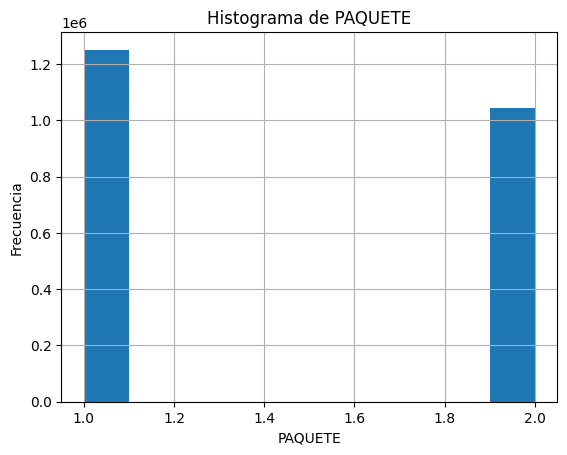

In [ ]:
variable_numerica = 'PAQUETE'
if variable_numerica in df.columns:
    df[variable_numerica].hist()
    plt.xlabel(variable_numerica)
    plt.ylabel('Frecuencia')
    plt.title('Histograma de ' + variable_numerica)
    plt.show()
else:
    print(f"La variable numérica '{variable_numerica}' no se encuentra en el dataframe.")

### 4.2 Variables categóricas

## 5. Detección de outliers

### 5.1 IQR 

<Axes: xlabel='PAQUETE'>

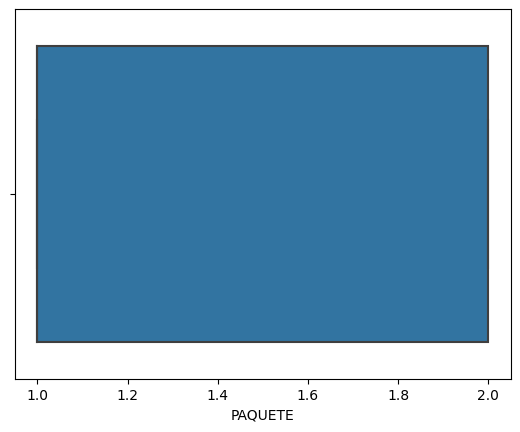

In [ ]:
sns.boxplot(x=df["PAQUETE"])

In [ ]:
Q1 = df['PAQUETE'].quantile(0.25)
Q3 = df['PAQUETE'].quantile(0.75)
IQR = Q3 - Q1  

In [ ]:
ol1 = df[df['PAQUETE'] < (Q1-1.5 * IQR)].shape[0] + df[df['PAQUETE'] > (Q3 + 1.5 * IQR)].shape[0]
ol1

0

### 5.2 Decisiones sobre outliers

En este caso podemos ver que la única variable numérica no tiene outliers con lo cual continuamos.

## 6. Análisis multivariado

### 6.1 Matriz de correlación

### 6.2 Bivariado: numérico vs numérico

### 6.3 Bivariado: numérico vs categórico

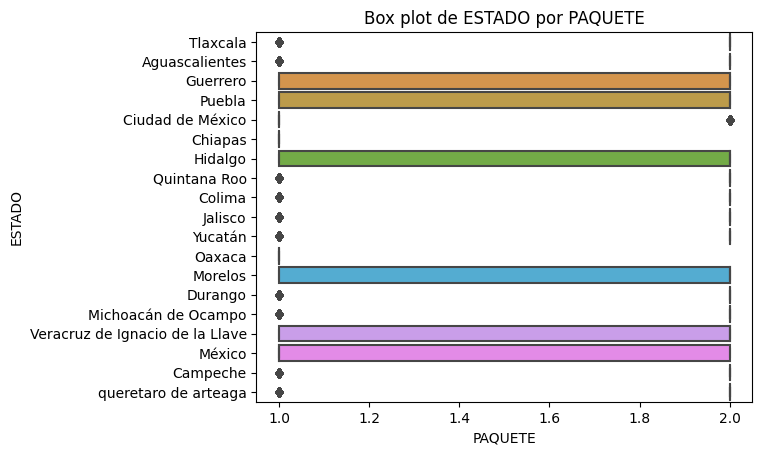

In [ ]:
variable_numerica = 'ESTADO'
variable_categorica = 'PAQUETE'

if variable_numerica in df.columns and variable_categorica in df.columns:
    sns.boxplot(x=variable_categorica, y=variable_numerica, data=df)
    plt.xlabel(variable_categorica)
    plt.ylabel(variable_numerica)
    plt.title(f'Box plot de {variable_numerica} por {variable_categorica}')
    plt.show()
else:
    print("Al menos una de las variables no se encuentra en el dataframe.")

## 7. Inteligencia artificial aplicada

### 7.1 Clustering

## 8. Dowload dataset

In [ ]:
df

,ESTADO,MUNICIPIO,ACUSE,APELLIDO PATERNO,APELLIDO MATERNO,NOMBRE (S),PAQUETE
0,Tlaxcala,Acuamanala de Miguel Hidalgo,23-PRONAFE-FERT-000018-S000-TL,AGUILA,LIMA,J. EUGENIO,2
1,Tlaxcala,Acuamanala de Miguel Hidalgo,23-PRONAFE-FERT-000016-S000-TL,CORTE,ESPINOZA,MA. PETRA APOLONIA,2
2,Tlaxcala,Acuamanala de Miguel Hidalgo,23-PRONAFE-FERT-000005-S000-TL,CORTE,PICHON,TERESA,2
3,Tlaxcala,Acuamanala de Miguel Hidalgo,23-PRONAFE-FERT-000006-S000-TL,CUAHTEPITZI,LUNA,FLORENCIO,2
4,Tlaxcala,Acuamanala de Miguel Hidalgo,23-PRONAFE-FERT-000007-S000-TL,CUAHTEPITZI,SANCHEZ,JOSE SIMON MARTIN,2
...,...,...,...,...,...,...,...
1628670,Puebla,Zoquitlán,23-PRONAFE-FERT-103186-S000-PL,ZAQUEROZ,MONTALVO,ZEFERINO,1
1628671,Puebla,Zoquitlán,23-PRONAFE-FERT-103187-S000-PL,ZAQUEROZ,SANCHEZ,CRECENCIO,2
1628672,Puebla,Zoquitlán,23-PRONAFE-FERT-103188-S000-PL,ZAQUEROZ,SANCHEZ,JOSE,1
1628673,Puebla,Zoquitlán,23-PRONAFE-FERT-103189-S000-PL,ZAQUEROZ,SANCHEZ,MARTIN,1


In [ ]:
df = df.sort_values('ESTADO', ascending=True)

In [ ]:
df.to_csv('../../data/productores_autorizados_fertilizantes.csv', index=False)